In [1]:
import pandas as pd
import numpy as np
import numpy as np

In [2]:
df2 = pd.read_csv('AmazonReal.csv')
df2 = pd.read_csv('AmazonFake.csv')

In [3]:
df=pd.read_csv('AmazonReal.csv', header=None, names=["Review"])
df['Real']="1"
df_fake=pd.read_csv('AmazonFake.csv', header=None, names=["Review"])
df_fake['Real']="0"
df_fake

,Review,Real
0,Product arrived labeled as Jumbo Salted Peanut...,0
1,My cats have been happily eating Felidae Plati...,0
2,"The candy is just red , No flavor . Just plan...",0
3,"This oatmeal is not good. Its mushy, soft, I d...",0
4,Arrived in 6 days and were so stale i could no...,0
...,...,...
61915,I was hoping to buy a basic black tea to make ...,0
61916,This is the worst split pea soup I have ever t...,0
61917,I bought this thinking it would be similar to ...,0
61918,When I first opened the bottle it smelled medi...,0


In [4]:
df2=df.append(df_fake, ignore_index=True)
df2

,Review,Real
0,Purchased for a high protein treat and it met ...,1
1,I ordered this jerky to try it out as an alter...,1
2,ohh boy oberto it is fresh jerky when it comes...,1
3,I wasn't expecting much when I got these on a ...,1
4,This was a very good product! I loved it and w...,1
...,...,...
122072,I was hoping to buy a basic black tea to make ...,0
122073,This is the worst split pea soup I have ever t...,0
122074,I bought this thinking it would be similar to ...,0
122075,When I first opened the bottle it smelled medi...,0


In [5]:
df2=df2.reindex(np.random.permutation(df2.index))
df2.reset_index(inplace=True, drop=True)
df2

,Review,Real
0,*****<br />This Izze Sparkling Pomegranate Sod...,1
1,From the above review (just like fresh) I purc...,0
2,Pro-Treat Freeze Dried Liver Dog Treats / B000...,1
3,Cafe Escapes Chai Latte K-Cups are terrific an...,1
4,Marinated chicken with this and was very disap...,0
...,...,...
122072,"Hi, My husband and I just wanted everyone to ...",1
122073,Better than I could have imagined. I can clos...,1
122074,Anyone who love chai lattes but not the huge c...,1
122075,This is a delicious sugar and the shape lets y...,1


In [6]:
!pip install -q streamlit
!pip install ipykernel>=5.1.2
!pip install pydeck
!pip install -q streamlit_ace

You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [7]:
!unzip ngrok-stable-linux-amd64.zip
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
get_ipython().system_raw('./ngrok http 8501 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the last cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


if this cell gives an error, run the next cell, and run this once again and then use Restart Runtime from the Runtime menu

In [78]:
!chmod +x /bin/bash:./ngrok

chmod: cannot access '/bin/bash:./ngrok': No such file or directory


In [9]:
df2.to_csv('AmazonReviews.csv')

In [10]:
df2["Real"] = df2["Real"].astype(str).astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122077 entries, 0 to 122076
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Review  122077 non-null  object
 1   Real    122077 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 1.4+ MB


In [11]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
#tfds.disable_progress_bar()

In [12]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

In [14]:
split = round(len(df2)*0.8)
train_reviews = df2['Review'][:split]
train_label = df2['Real'][:split]
test_reviews = df2['Review'][split:]
test_label = df2['Real'][split:]
train_reviews

0        *****<br />This Izze Sparkling Pomegranate Sod...
1        From the above review (just like fresh) I purc...
2        Pro-Treat Freeze Dried Liver Dog Treats / B000...
3        Cafe Escapes Chai Latte K-Cups are terrific an...
4        Marinated chicken with this and was very disap...
                               ...                        
97657    These are perhaps the worst chips that have ev...
97658    I found this food to be too rich for my 25 lb ...
97659    I was all set to buy these thinking they'd be ...
97660    I love this product and and so glad I can orde...
97661    Very Healthy peanut butter compared to others....
Name: Review, Length: 97662, dtype: object

In [15]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

In [16]:
vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [17]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'the': 2,
 'i': 3,
 'and': 4,
 'a': 5,
 'to': 6,
 'it': 7,
 'of': 8,
 'this': 9,
 'is': 10,
 'br': 11,
 'in': 12,
 'for': 13,
 'my': 14,
 'that': 15,
 'was': 16,
 'not': 17,
 'but': 18,
 'have': 19,
 'with': 20,
 'you': 21,
 'they': 22,
 'are': 23,
 'on': 24,
 'like': 25,
 'as': 26,
 'so': 27,
 'these': 28,
 'them': 29,
 'be': 30,
 'product': 31,
 'at': 32,
 'taste': 33,
 'one': 34,
 'just': 35,
 'or': 36,
 'all': 37,
 'from': 38,
 'if': 39,
 'very': 40,
 'good': 41,
 'had': 42,
 'coffee': 43,
 'food': 44,
 'when': 45,
 'would': 46,
 'we': 47,
 'me': 48,
 'will': 49,
 'no': 50,
 'can': 51,
 'great': 52,
 'out': 53,
 'flavor': 54,
 'has': 55,
 'more': 56,
 'tea': 57,
 "it's": 58,
 'amazon': 59,
 'love': 60,
 'get': 61,
 'other': 62,
 'about': 63,
 'were': 64,
 'up': 65,
 'only': 66,
 'what': 67,
 'than': 68,
 "don't": 69,
 'some': 70,
 'really': 71,
 'even': 72,
 'your': 73,
 'because': 74,
 'an': 75,
 'buy': 76,
 'she': 77,
 'there': 78,
 'do': 79,
 'much': 80,
 'too': 81

In [18]:
sequences = tokenizer.texts_to_sequences(training_sentences)
train_data = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
test_data = pad_sequences(testing_sentences, maxlen=max_length)

In [19]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)
training_labels_final

array([1, 0, 1, ..., 0, 1, 1])

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           640000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 136       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 640,185
Trainable params: 640,185
Non-trainable params: 0
__________________________________________________

In [23]:
num_epochs = 7
history = model.fit(train_data, training_labels_final,epochs=num_epochs, validation_data=(test_data, testing_labels_final))

Epoch 1/7
3052/3052 [==============================] - 32s 10ms/step - loss: 0.3521 - accuracy: 0.8735 - val_loss: 0.2339 - val_accuracy: 0.9219
Epoch 2/7
3052/3052 [==============================] - 32s 10ms/step - loss: 0.1958 - accuracy: 0.9340 - val_loss: 0.2094 - val_accuracy: 0.9228
Epoch 3/7
3052/3052 [==============================] - 34s 11ms/step - loss: 0.1595 - accuracy: 0.9464 - val_loss: 0.2062 - val_accuracy: 0.9240
Epoch 4/7
3052/3052 [==============================] - 33s 11ms/step - loss: 0.1395 - accuracy: 0.9535 - val_loss: 0.2106 - val_accuracy: 0.9243
Epoch 5/7
3052/3052 [==============================] - 36s 12ms/step - loss: 0.1255 - accuracy: 0.9593 - val_loss: 0.2161 - val_accuracy: 0.9226
Epoch 6/7
3052/3052 [==============================] - 31s 10ms/step - loss: 0.1125 - accuracy: 0.9644 - val_loss: 0.2276 - val_accuracy: 0.9234
Epoch 7/7
3052/3052 [==============================] - 32s 10ms/step - loss: 0.1021 - accuracy: 0.9682 - val_loss: 0.2407 - val_ac

In [24]:
model.evaluate(train_data, training_labels_final)

3052/3052 [==============================] - 2s 718us/step - loss: 0.0850 - accuracy: 0.9766


[0.08504635095596313, 0.9766132235527039]

<Figure size 720x360 with 0 Axes>

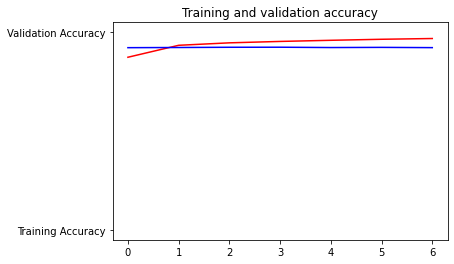

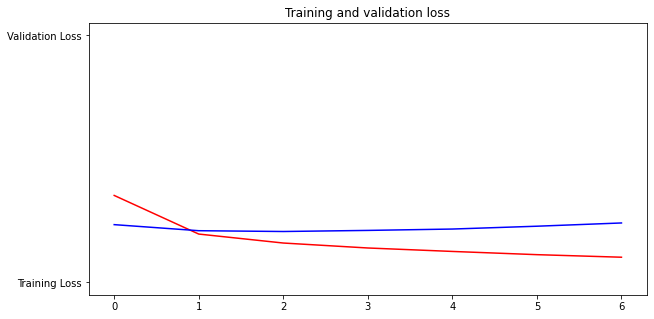

<Figure size 720x360 with 0 Axes>

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure(figsize=(10,5))

In [26]:
model.save('dmaa_model_mod.h5')

In [27]:
import keras
model_loaded = keras.models.load_model("dmaa_model_mod.h5")
'''np.testing.assert_allclose(
    model.predict(test_data), reconstructed_model.predict(test_data)
)'''

'np.testing.assert_allclose(\n    model.predict(test_data), reconstructed_model.predict(test_data)\n)'

In [28]:
model_loaded.fit(test_data, testing_labels_final)
model_loaded.evaluate(test_data, testing_labels_final)

763/763 [==============================] - 1s 709us/step - loss: 0.1599 - accuracy: 0.9456


[0.15990382432937622, 0.9455662369728088]